In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import seaborn as sns


## Loading cleaned data

In [2]:
#Load the cleaned DF_2019nn2_imp in a new csv file
# df_2019_new.to_csv("Data/SB11_2019_clean2_nn.csv", sep = ',',index = False,encoding='ISO-8859-1')#'UTF-8')
df_2019_new = pd.read_csv('Data/SB11_2019_clean2_nn.csv',skiprows= 0,encoding='ISO-8859-1')#'ISO-8859-1')#, nrows=100000)

In [3]:
pd.options.display.max_columns = None
df_2019_new.head()


,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_ETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_DEPTO_UBICACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_Edad
0,COLOMBIA,F,2000-07-12,COLOMBIA,No,Ninguno,VALLE,CALI,Estrato 4,3 a 4,Cuatro,Técnica o tecnológica incompleta,Secundaria (Bachillerato) completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,Si,Si,No,No,No,0 A 10 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,Todos o casi todos los días,Mejor,Entre 1 y 2 horas,Entre 1 y 3 horas,0,No,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,S,URBANO,NOCHE,CALI,VALLE,50,29,2,49,31,2,47,33,2,40,22,1,54.0,39,A1,235,29.0,58.199483,3.0,3.0,18.5
1,COLOMBIA,F,1998-03-23,COLOMBIA,No,Ninguno,VALLE,CALI,Estrato 3,7 a 8,Cuatro,Técnica o tecnológica completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,No,No,No,No,11 A 25 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,Nunca o rara vez comemos eso,Mejor,No leo por entretenimiento,Entre 1 y 3 horas,0,No,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,S,URBANO,NOCHE,CALI,VALLE,53,35,3,45,25,2,44,27,2,34,10,1,35.0,10,A-,217,21.0,51.018527,2.0,3.0,20.8
2,COLOMBIA,M,2001-03-22,COLOMBIA,No,Ninguno,VALLE,CALI,Estrato 2,5 a 6,Cuatro,Primaria incompleta,Educación profesional completa,Es dueño de un negocio pequeño (tiene pocos em...,Tiene un trabajo de tipo auxiliar administrati...,Si,Si,No,Si,Si,No,No,Si,0 A 10 LIBROS,3 a 5 veces por semana,Nunca o rara vez comemos eso,Nunca o rara vez comemos eso,Igual,No leo por entretenimiento,30 minutos o menos,Más de 30 horas,"Si, en efectivo",INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,S,URBANO,NOCHE,CALI,VALLE,60,54,3,52,38,3,44,27,2,41,23,2,49.0,32,A1,246,34.0,50.855657,2.0,3.0,17.8
3,COLOMBIA,M,1994-06-16,COLOMBIA,No,Ninguno,VALLE,CALI,Estrato 2,3 a 4,Dos,Educación profesional completa,Educación profesional completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,No,Si,No,Si,No,0 A 10 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,Nunca o rara vez comemos eso,Igual,No leo por entretenimiento,Más de 3 horas,Entre 11 y 20 horas,"Si, en efectivo",INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,S,URBANO,NOCHE,CALI,VALLE,56,41,3,54,43,3,46,30,2,44,29,2,64.0,55,A2,255,38.0,52.688203,3.0,3.0,24.6
4,COLOMBIA,F,2000-09-21,COLOMBIA,No,Ninguno,BOGOTA,BOGOTÁ D.C.,Estra

# Analysis within the dataset - EDA

## Small results within the scores of the test

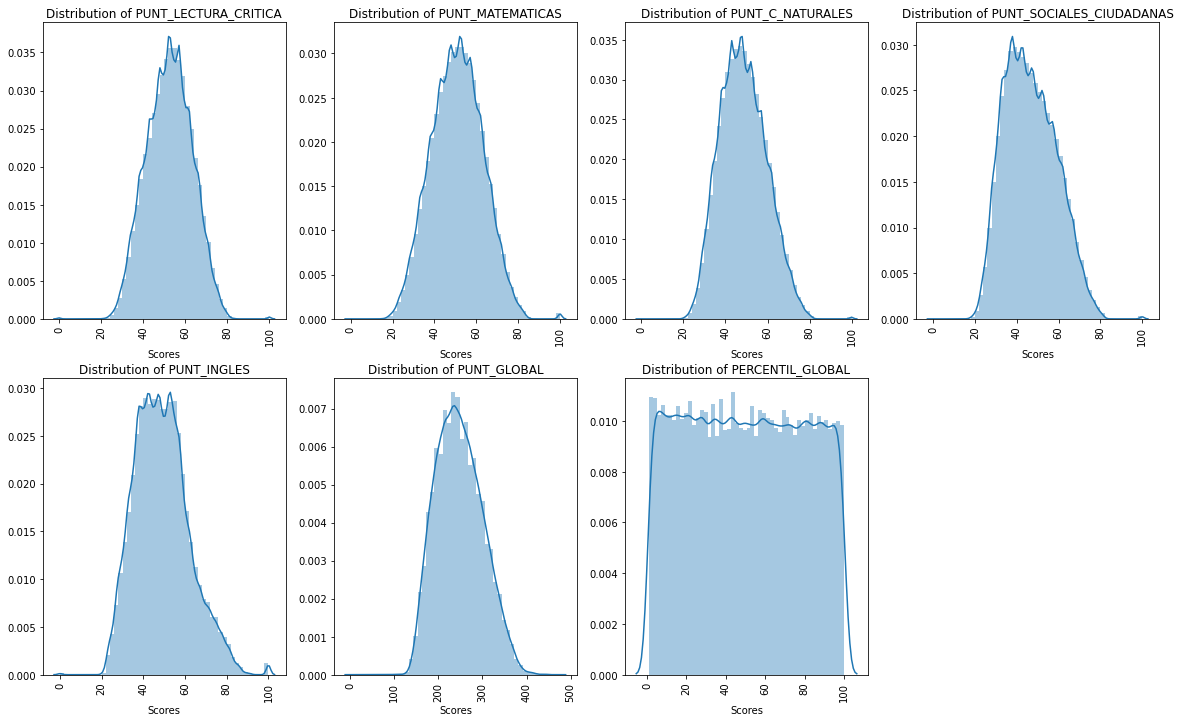

In [4]:
plt.figure(figsize=(20,12))
list_scores=['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS',
             'PUNT_INGLES','PUNT_GLOBAL','PERCENTIL_GLOBAL']
for i, var in enumerate(list_scores):
#     df_2019_df_tt = df_2019_new_nscores_drop
#     Emissions_C_df_box =pd.DataFrame(Emissions_C_df_tt[Emissions_C_df_tt['Indicator Code']==var])
    x=df_2019_new[var].to_list()
    plt.subplot(2,4,i+1)
    sns.distplot(x)
    title_string = "Distribution of " + var
    #plt.ylabel("Students")
    plt.xlabel("Scores")
    plt.xticks(rotation=90)
    plt.title(title_string)


<ipython-input-5-f8732e3e7c5d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtemp['PUNT_GLOBAL']=xtemp['PUNT_GLOBAL']/5


Text(0, 0.5, 'Scores')

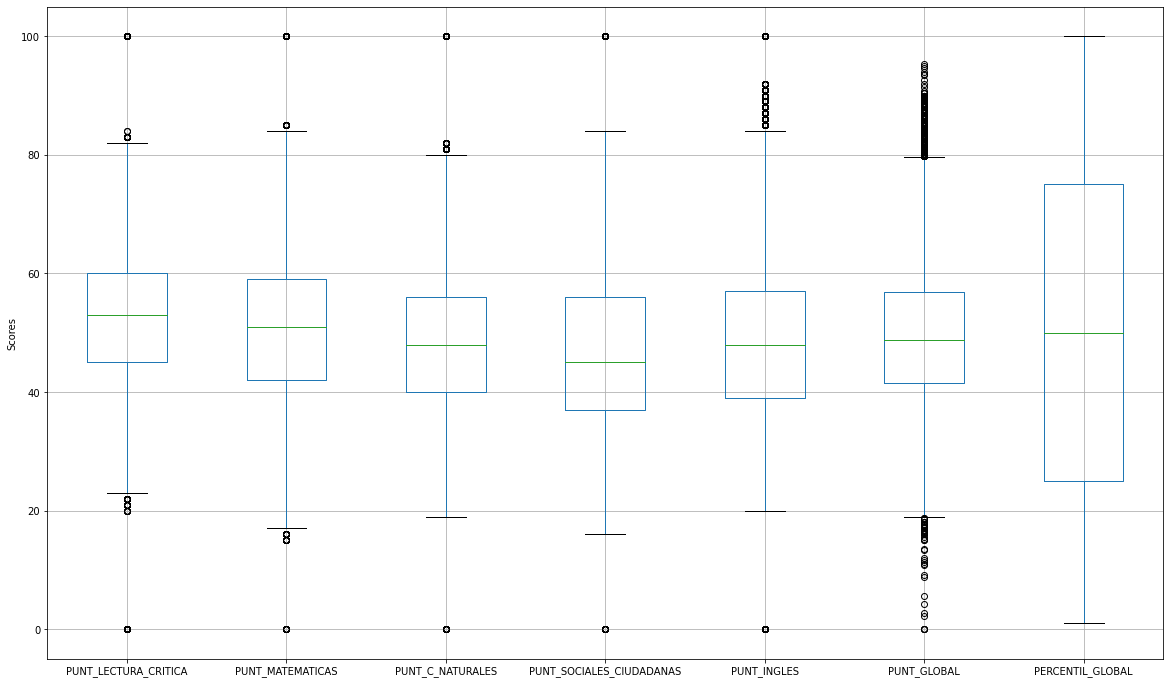

In [5]:
#Box plots of the scores
plt.figure(figsize=(20,12))
list_scores=['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS',
             'PUNT_INGLES','PUNT_GLOBAL','PERCENTIL_GLOBAL']
xtemp = df_2019_new[list_scores]
xtemp['PUNT_GLOBAL']=xtemp['PUNT_GLOBAL']/5
xtemp.boxplot(column=list_scores)
plt.ylabel("Scores")

In [6]:
df_2019_new['PUNT_GLOBAL'].max()

477

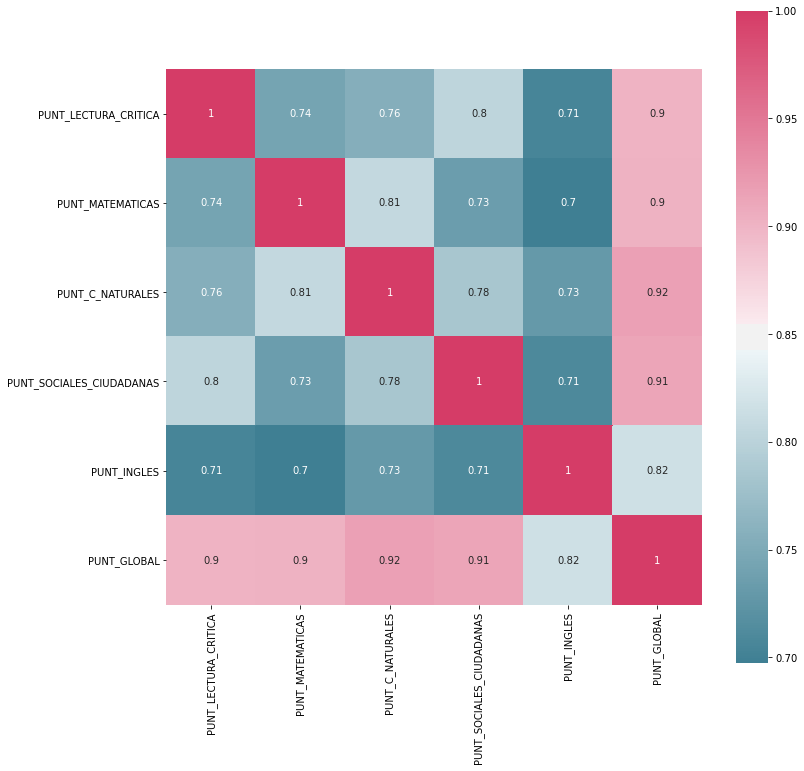

In [7]:
import seaborn as sns

list_scores1 = ['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS',
                'PUNT_INGLES','PUNT_GLOBAL']
f, ax = plt.subplots(figsize=(12, 12))
corr = df_2019_new[list_scores1].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 1, as_cmap=True),
            square=True, ax=ax, annot=True)

### Analysis of the socio-economical features of the students and their families

In [8]:
df_2019_new.columns

Index(['ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO',
       'ESTU_PAIS_RESIDE', 'ESTU_TIENEETNIA', 'ESTU_ETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE', 'FAMI_ESTRATOVIVIENDA',
       'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE',
       'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA',
       'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_GENERO',
       'COLE_NATURALEZA', 'COLE_CALENDARIO', 'COLE_BILINGUE', 'COLE_CARACTER',
       'COL

Giving the order of the categorical variables for the graphs

In [9]:
order_categorical_variables1 = {
    'FAMI_ESTRATOVIVIENDA':['Sin Estrato', 'Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6'],
    'FAMI_PERSONASHOGAR':['1 a 2', '3 a 4', '5 a 6', '7 a 8', '9 o más'],
    'FAMI_CUARTOSHOGAR': ['Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis o mas'],
    'FAMI_EDUCACIONPADRE': ['No Aplica', 'No sabe', 'Ninguno', 'Primaria incompleta', 'Primaria completa', 'Secundaria (Bachillerato) incompleta', 'Secundaria (Bachillerato) completa', 'Técnica o tecnológica incompleta', 'Técnica o tecnológica completa', 'Educación profesional incompleta', 'Educación profesional completa', 'Postgrado'],
    'FAMI_EDUCACIONMADRE': ['No Aplica', 'No sabe', 'Ninguno', 'Primaria incompleta', 'Primaria completa', 'Secundaria (Bachillerato) incompleta', 'Secundaria (Bachillerato) completa', 'Técnica o tecnológica incompleta', 'Técnica o tecnológica completa', 'Educación profesional incompleta', 'Educación profesional completa', 'Postgrado'],
    'FAMI_NUMLIBROS': ['0 A 10 LIBROS', '11 A 25 LIBROS', '26 A 100 LIBROS', 'MÁS DE 100 LIBROS'],
    'FAMI_COMELECHEDERIVADOS': ['Nunca o rara vez comemos eso', '1 o 2 veces por semana', '3 a 5 veces por semana', 'Todos o casi todos los días'],
    'FAMI_COMECARNEPESCADOHUEVO': ['Nunca o rara vez comemos eso', '1 o 2 veces por semana', '3 a 5 veces por semana', 'Todos o casi todos los días'],
    'FAMI_COMECEREALFRUTOSLEGUMBRE': ['Nunca o rara vez comemos eso', '1 o 2 veces por semana', '3 a 5 veces por semana', 'Todos o casi todos los días'],
    'FAMI_SITUACIONECONOMICA': ['Peor', 'Igual', 'Mejor'],
    'ESTU_DEDICACIONLECTURADIARIA': ['No leo por entretenimiento', '30 minutos o menos', 'Entre 30 y 60 minutos', 'Entre 1 y 2 horas', 'Más de 2 horas'],
    'ESTU_DEDICACIONINTERNET': ['No Navega Internet', '30 minutos o menos', 'Entre 30 y 60 minutos', 'Entre 1 y 3 horas', 'Más de 3 horas'],
    'ESTU_HORASSEMANATRABAJA': ['0', 'Menos de 10 horas', 'Entre 11 y 20 horas', 'Entre 21 y 30 horas', 'Más de 30 horas'], 
        'ESTU_GENERO' : ['F', 'M'],
    'ESTU_TIENEETNIA' : ['No', 'Si'],
    'ESTU_ETNIA' : ['Arhuaco', 'Cancuamo', 'Comunidad afrodescendiente', 'Comunidades Rom (Gitanas)',
                    'Cubeo', 'Emberá', 'Guambiano', 'Huitoto', 'Inga', 'Paez', 'Palenquero', 'Pasto',
                    'Pijao', 'Raizal', 'Sikuani', 'Tucano', 'Wayúu', 'Zenú', 'Otro grupo étnico minoritario','Ninguno'],
    'FAMI_TRABAJOLABORPADRE' : ['No aplica','No sabe',
                                'Trabaja en el hogar, no trabaja o estudia',
                                'Trabaja como personal de limpieza, mantenimiento, seguridad o construcción',
                                'Es agricultor, pesquero o jornalero',
                                'Pensionado',
                                'Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)',
                                'Es operario de máquinas o conduce vehículos (taxita, chofer)',
                                'Es vendedor o trabaja en atención al público',
                                'Trabaja por cuenta propia (por ejemplo plomero, electricista)',
                                'Trabaja como profesional (por ejemplo médico, abogado, ingeniero)',
                                'Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc',
                                'Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial'],
    'FAMI_TRABAJOLABORMADRE' : ['No aplica','No sabe',
                                'Trabaja en el hogar, no trabaja o estudia',
                                'Trabaja como personal de limpieza, mantenimiento, seguridad o construcción',
                                'Es agricultor, pesquero o jornalero',
                                'Pensionado',
                                'Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)',
                                'Es operario de máquinas o conduce vehículos (taxita, chofer)',
                                'Es vendedor o trabaja en atención al público',
                                'Trabaja por cuenta propia (por ejemplo plomero, electricista)',
                                'Trabaja como profesional (por ejemplo médico, abogado, ingeniero)',
                                'Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc',
                                'Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial'],
    'FAMI_TIENEINTERNET': ['No','Si'],
    'FAMI_TIENESERVICIOTV' : ['No','Si'],
    'FAMI_TIENECOMPUTADOR' : ['No','Si'],
    'FAMI_TIENELAVADORA' : ['No','Si'],
    'FAMI_TIENEHORNOMICROOGAS' : ['No','Si'],
    'FAMI_TIENEAUTOMOVIL' : ['No','Si'],
    'FAMI_TIENEMOTOCICLETA' : ['No','Si'],
    'FAMI_TIENECONSOLAVIDEOJUEGOS' : ['No','Si'],
    'ESTU_TIPOREMUNERACION':['No', 'Si, en especie','Si, en efectivo y especie','Si, en efectivo']

}    


In [10]:
vars_to_plot = df_2019_new.loc[:,'FAMI_ESTRATOVIVIENDA':'FAMI_CUARTOSHOGAR'].columns
vars_to_plot
y_var = 'PERCENTIL_GLOBAL'
# y_var = 'PUNT_GLOBAL'#'PERCENTIL_GLOBAL'

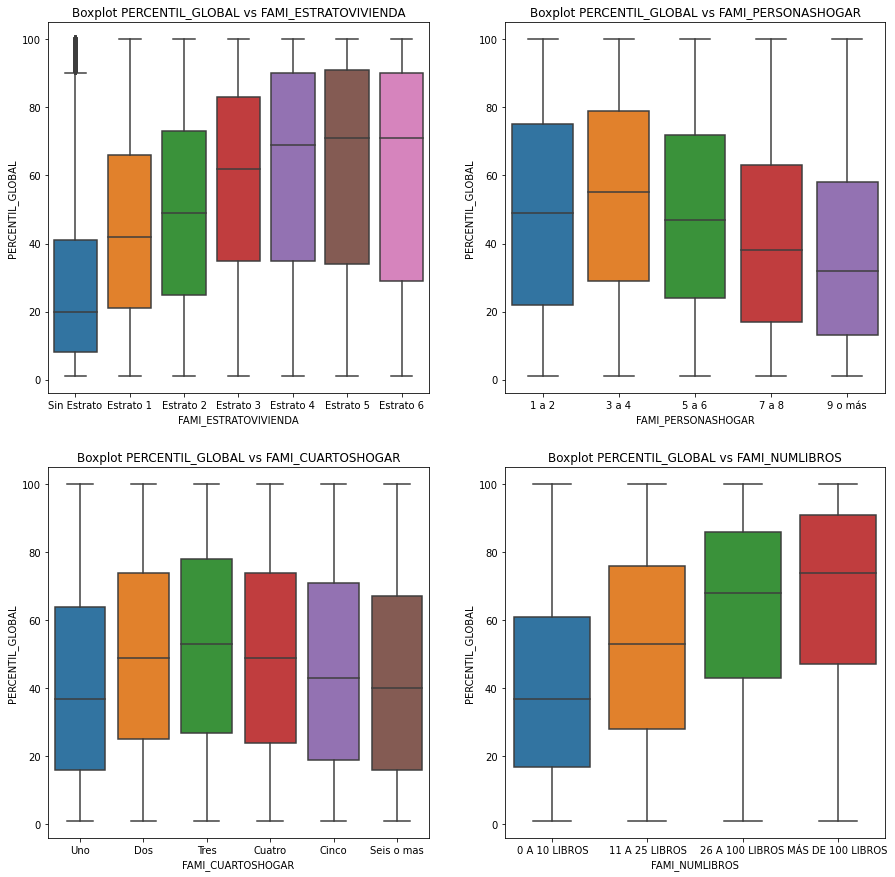

In [11]:
# Analisis descriptivo de: Estrato, numero de personas en la familia y cuartos y num libros
plt.figure(figsize=(15,15))
vars_to_plot = df_2019_new.loc[:,['FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR','FAMI_NUMLIBROS']].columns
#vars_to_plot = vars_to_plot.append('')
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1)
    sns.boxplot(x =var, y=y_var, data = df_2019_new, order=order_categorical_variables1[var])
    title_string = "Boxplot " + y_var + " vs " + var
    plt.ylabel(y_var)
#     plt.xlabel("Percentil")
    #plt.xticks(np.arange(len(odrer_categorical_variables1[var])),odrer_categorical_variables1[var])
    plt.title(title_string)

In [12]:
# Validacion de la exclusion del numero de personas en la familia
import scipy.stats as stats
stats.f_oneway(df_2019_new[y_var][df_2019_new['FAMI_PERSONASHOGAR'] == '1 a 2'],
               df_2019_new[y_var][df_2019_new['FAMI_PERSONASHOGAR'] == '3 a 4'],
               df_2019_new[y_var][df_2019_new['FAMI_PERSONASHOGAR'] == '5 a 6'],
               df_2019_new[y_var][df_2019_new['FAMI_PERSONASHOGAR'] == '7 a 8'],
               df_2019_new[y_var][df_2019_new['FAMI_PERSONASHOGAR'] == '9 o más'])

F_onewayResult(statistic=3208.683959616347, pvalue=0.0)

In [13]:
# Validacion de la exclusion del numero de cuartos
import scipy.stats as stats
stats.f_oneway(df_2019_new[y_var][df_2019_new['FAMI_CUARTOSHOGAR'] == 'Uno'],
               df_2019_new[y_var][df_2019_new['FAMI_CUARTOSHOGAR'] == 'Dos'],
               df_2019_new[y_var][df_2019_new['FAMI_CUARTOSHOGAR'] == 'Tres'],
               df_2019_new[y_var][df_2019_new['FAMI_CUARTOSHOGAR'] == 'Cuatro'],
               df_2019_new[y_var][df_2019_new['FAMI_CUARTOSHOGAR'] == 'Cinco'],
               df_2019_new[y_var][df_2019_new['FAMI_CUARTOSHOGAR'] == 'Seis o mas'])

F_onewayResult(statistic=1137.6674093038325, pvalue=0.0)

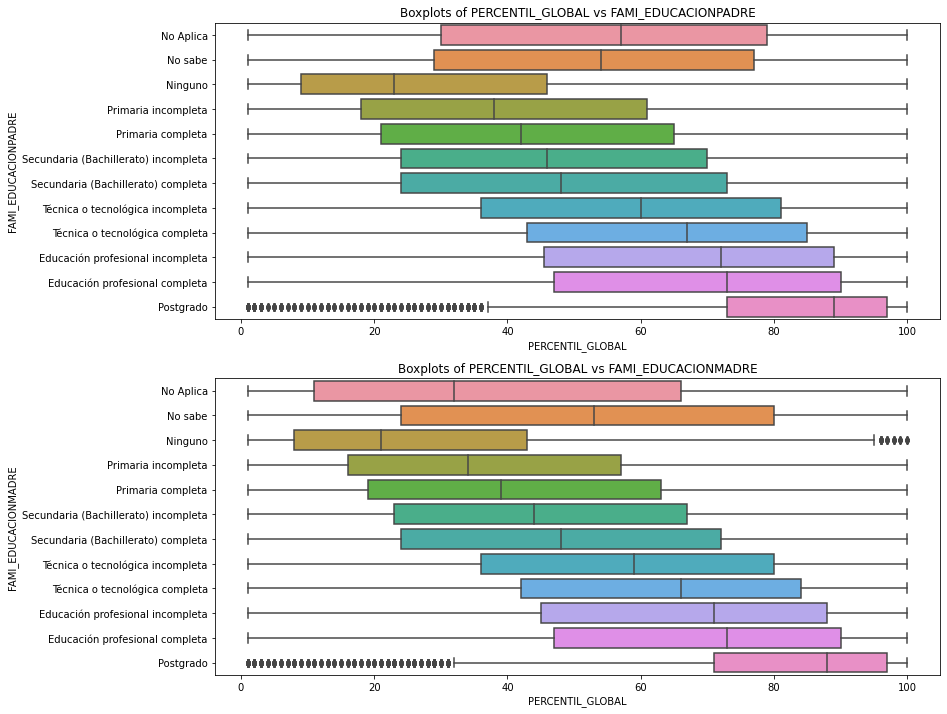

In [14]:
# Analisis descriptivo de: Educacion del Padre y la Madre
plt.figure(figsize=(13,12))
vars_to_plot = df_2019_new.loc[:,'FAMI_EDUCACIONPADRE':'FAMI_EDUCACIONMADRE'].columns
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,1,i+1)
    sns.boxplot(x = y_var, y=var, data = df_2019_new,order=order_categorical_variables1[var])
    title_string = "Boxplots of " + y_var + " vs " + var
    plt.xlabel(y_var)
    plt.title(title_string)
    #plt.xticks(rotation=45)

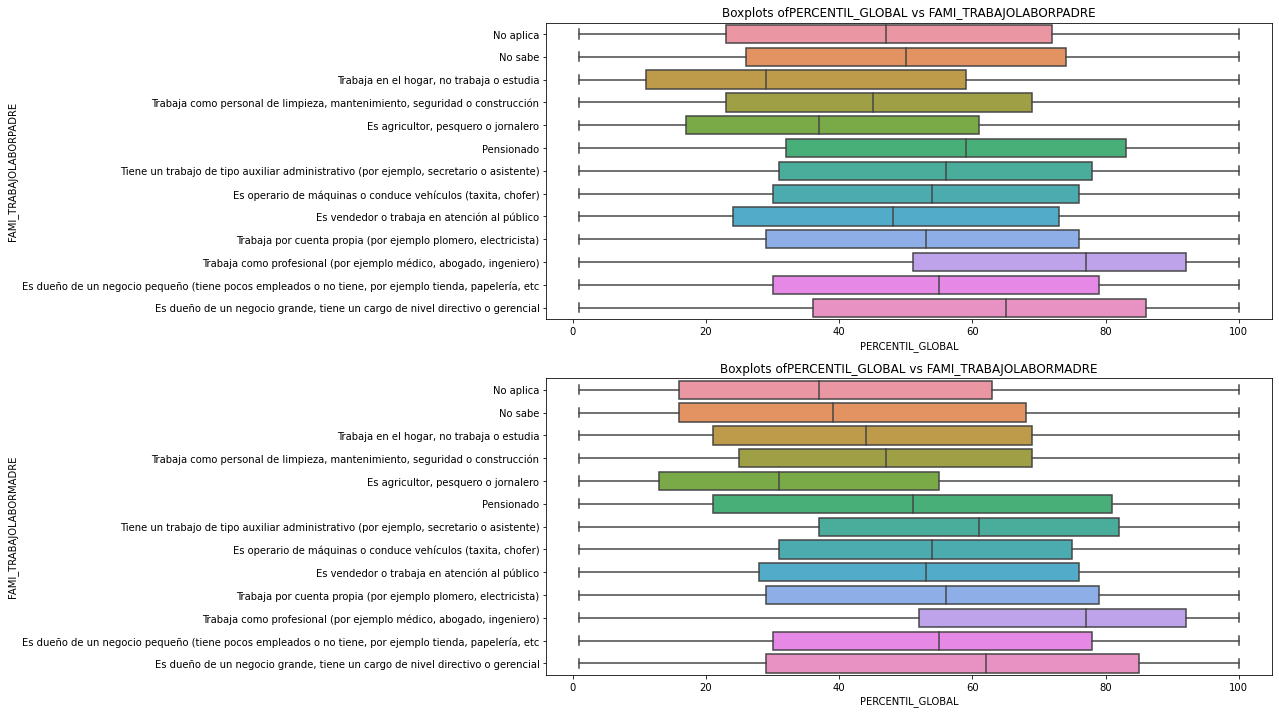

In [15]:
# Analisis descriptivo del: Tipo de trabajo del Padre y la Madre
plt.figure(figsize=(13,12))
vars_to_plot = df_2019_new.loc[:,'FAMI_TRABAJOLABORPADRE':'FAMI_TRABAJOLABORMADRE'].columns
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,1,i+1)
    sns.boxplot(x = y_var, y=var, data = df_2019_new,order=order_categorical_variables1[var])
    title_string = "Boxplots of" + y_var + " vs " + var
    plt.xlabel(y_var)
    plt.title(title_string)
#     plt.xticks(rotation=90)

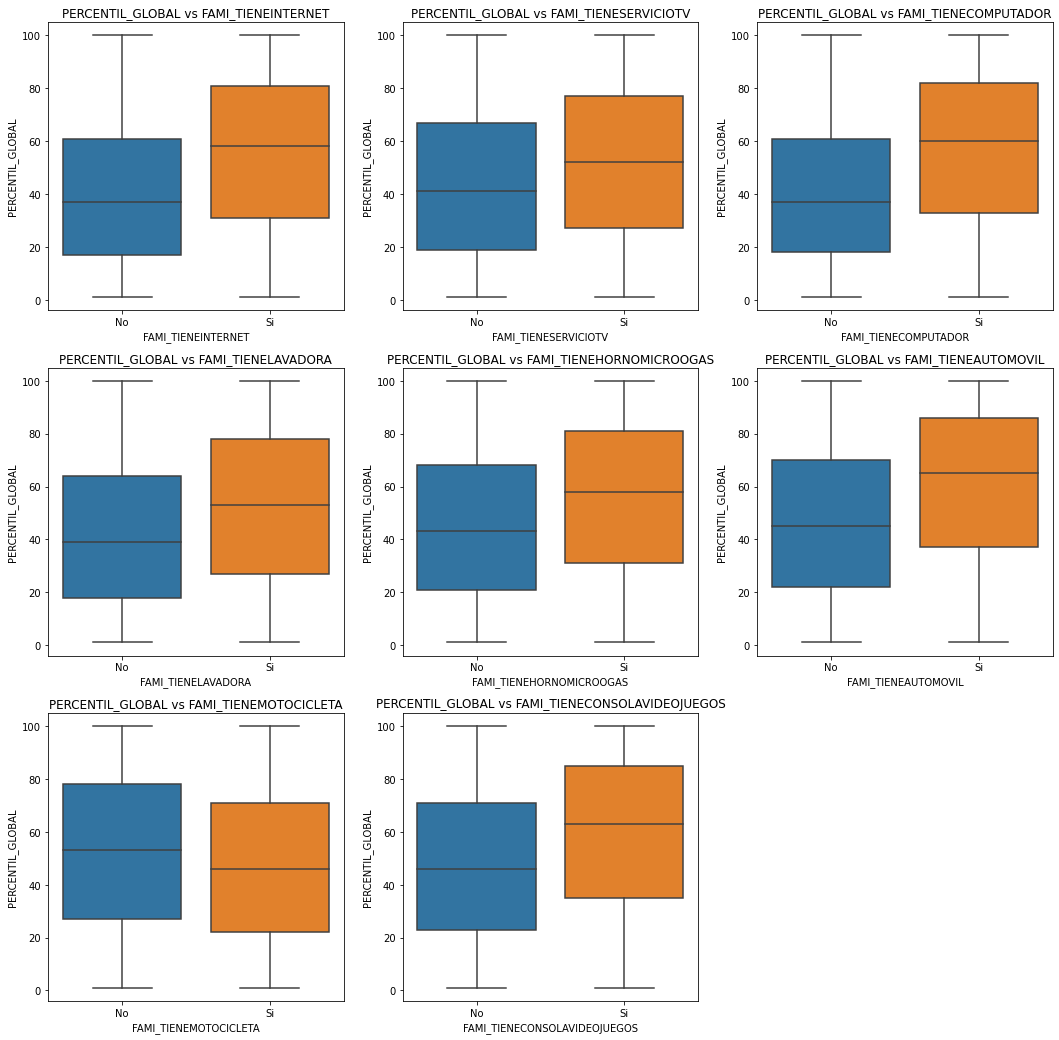

In [16]:
# Analisis descriptivo de: Acceso a internet, TV, PC, Microhondas, Auto familiar, motocicleta familiar, videojuegos, Libros
plt.figure(figsize=(18,18))
vars_to_plot = df_2019_new.loc[:,'FAMI_TIENEINTERNET':'FAMI_TIENECONSOLAVIDEOJUEGOS'].columns
for i, var in enumerate(vars_to_plot):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = var, y=y_var, data = df_2019_new,order=order_categorical_variables1[var])
    title_string = y_var + " vs " + var
    plt.ylabel(y_var)
    plt.title(title_string)

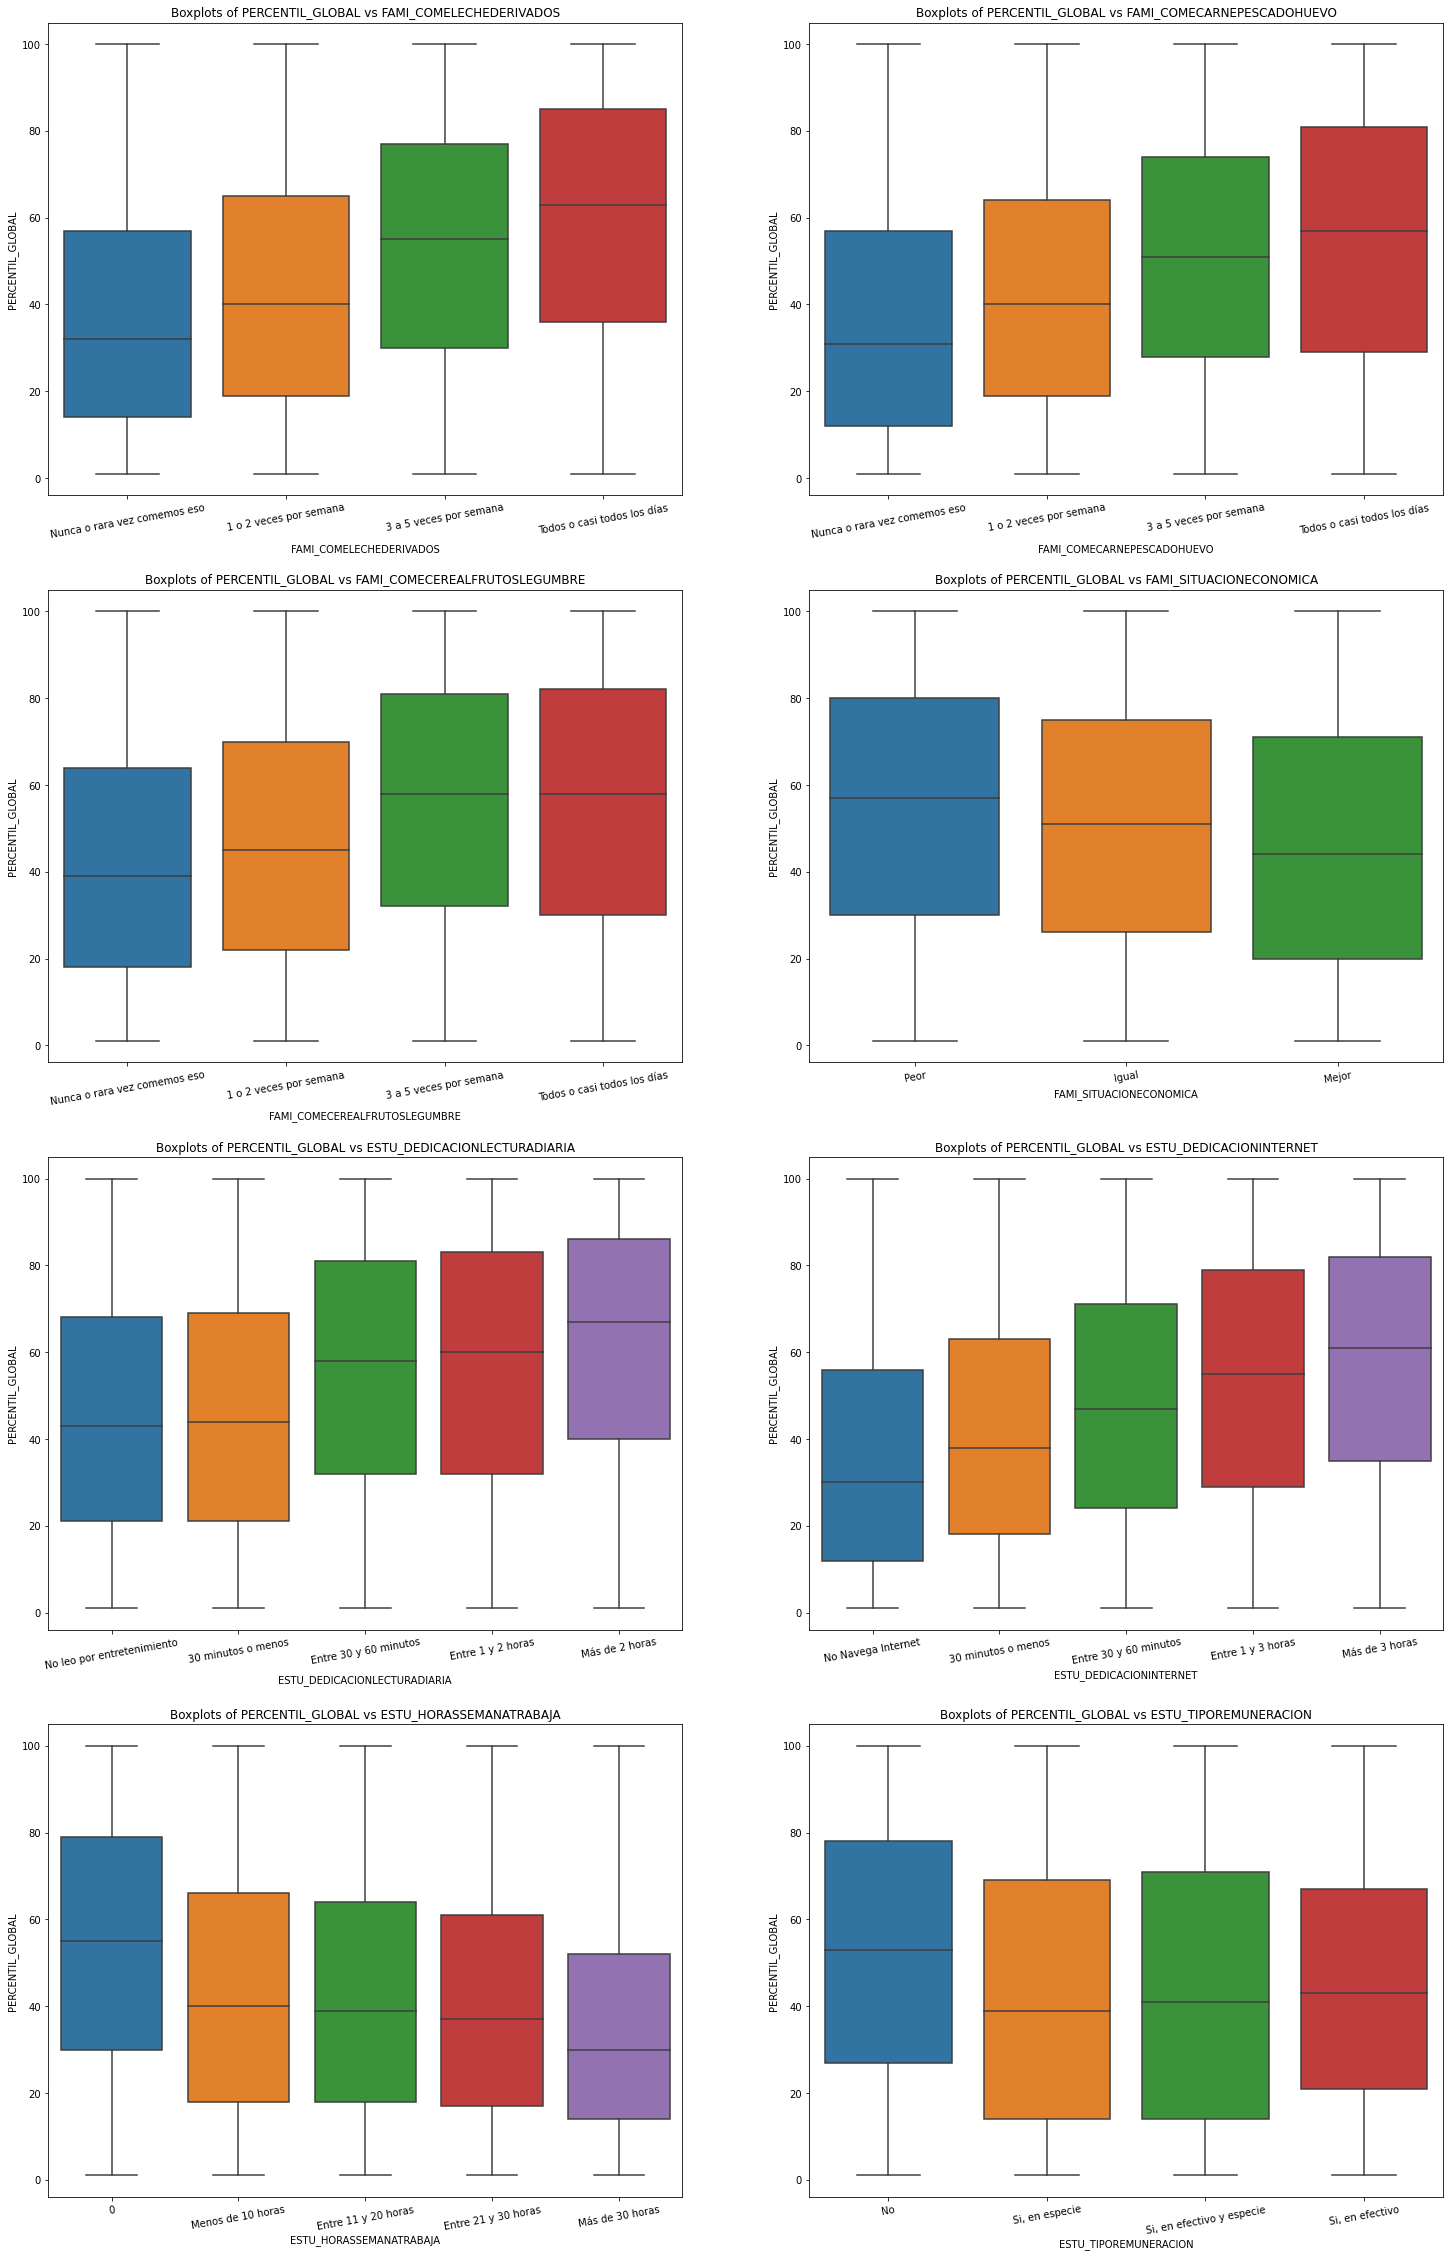

In [17]:
# Analisis descriptivo de: Tipo de alimentacion, situacion economica, educacion diaria, dedicacion a internet diaria, trabajo u remuneracion
plt.figure(figsize=(25,40))
vars_to_plot = df_2019_new.loc[:,'FAMI_COMELECHEDERIVADOS':'ESTU_TIPOREMUNERACION'].columns
for i, var in enumerate(vars_to_plot):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = var, y=y_var, data = df_2019_new,order=order_categorical_variables1[var])
    title_string = "Boxplots of " + y_var + " vs " + var
    plt.ylabel(y_var)
    plt.xticks(rotation=10)
    plt.title(title_string)

## Turning some ordinal variables into numbers

In [18]:
# #Code from Felipe
# #In the meantime we are setting the NaNs values as No Data, but this needs to be evaluated further
# df_2019_no_nan = df_2019_new.fillna('No data')

oder_categorical_variables = {
    'FAMI_ESTRATOVIVIENDA':['Sin Estrato', 'Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6'],
    'FAMI_PERSONASHOGAR':['1 a 2', '3 a 4', '5 a 6', '7 a 8', '9 o más'],
    'FAMI_CUARTOSHOGAR': ['No data','Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis o mas'],
    'FAMI_EDUCACIONPADRE': ['No Aplica', 'No sabe', 'Ninguno', 'Primaria incompleta', 'Primaria completa', 'Secundaria (Bachillerato) incompleta', 'Secundaria (Bachillerato) completa', 'Técnica o tecnológica incompleta', 'Técnica o tecnológica completa', 'Educación profesional incompleta', 'Educación profesional completa', 'Postgrado'],
    'FAMI_EDUCACIONMADRE': ['No Aplica', 'No sabe', 'Ninguno', 'Primaria incompleta', 'Primaria completa', 'Secundaria (Bachillerato) incompleta', 'Secundaria (Bachillerato) completa', 'Técnica o tecnológica incompleta', 'Técnica o tecnológica completa', 'Educación profesional incompleta', 'Educación profesional completa', 'Postgrado'],
    'FAMI_NUMLIBROS': ['0 A 10 LIBROS', '11 A 25 LIBROS', '26 A 100 LIBROS', 'MÁS DE 100 LIBROS'],
    'FAMI_COMELECHEDERIVADOS': ['Nunca o rara vez comemos eso', '1 o 2 veces por semana', '3 a 5 veces por semana', 'Todos o casi todos los días'],
    'FAMI_COMECARNEPESCADOHUEVO': ['Nunca o rara vez comemos eso', '1 o 2 veces por semana', '3 a 5 veces por semana', 'Todos o casi todos los días'],
    'FAMI_COMECEREALFRUTOSLEGUMBRE': ['Nunca o rara vez comemos eso', '1 o 2 veces por semana', '3 a 5 veces por semana', 'Todos o casi todos los días'],
    'FAMI_SITUACIONECONOMICA': ['Peor', 'Igual', 'Mejor'],
    'ESTU_DEDICACIONLECTURADIARIA': ['No leo por entretenimiento', '30 minutos o menos', 'Entre 30 y 60 minutos', 'Entre 1 y 2 horas', 'Más de 2 horas'],
    'ESTU_DEDICACIONINTERNET': ['No Navega Internet', '30 minutos o menos', 'Entre 30 y 60 minutos', 'Entre 1 y 3 horas', 'Más de 3 horas'],
    'ESTU_HORASSEMANATRABAJA': ['0', 'Menos de 10 horas', 'Entre 11 y 20 horas', 'Entre 21 y 30 horas', 'Más de 30 horas'], 
}

# columnas_irrelevantes = [
#     'ESTU_ESTUDIANTE', # Solo tiene un valor
#     'ESTU_COD_RESIDE_DEPTO', #Es un codigo, pero ya tenemos el nombre del dpto
#     'ESTU_COD_RESIDE_MCPIO', #Mismo de arriba
#     'COLE_CODIGO_ICFES', #Ya tenemos el nombre del colegio
#     'COLE_COD_DANE_ESTABLECIMIENTO', #Misma de arriba
#     'COLE_COD_DANE_SEDE', #No da info adicional, salvo si el colegio tiene diferentes sedes
#     'COLE_NOMBRE_SEDE', #Mismo de arriba
#     'COLE_COD_MCPIO_UBICACION', #Solo daría información en caso de que el estudiante se tenga que desplazar desde su municipio a otro para ir al colegio
#     'COLE_MCPIO_UBICACION', #Mismo de arriba
#     'COLE_COD_DEPTO_UBICACION', #Mismo de arriba
#     'COLE_DEPTO_UBICACION', #Mismo de arriba
# ]

df_2019_ordinal = df_2019_new.copy()

#Este código reemplaza las categoricas ordinales por númericas

for column in oder_categorical_variables:
    for index, value in enumerate(oder_categorical_variables[column]):
        mask = df_2019_ordinal[column] == value
        df_2019_ordinal.loc[mask, column] = str(index)
    df_2019_ordinal[column] = df_2019_ordinal[column].astype(int)

In [19]:
df_2019_ordinal.columns

Index(['ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO',
       'ESTU_PAIS_RESIDE', 'ESTU_TIENEETNIA', 'ESTU_ETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE', 'FAMI_ESTRATOVIVIENDA',
       'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE',
       'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA',
       'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_GENERO',
       'COLE_NATURALEZA', 'COLE_CALENDARIO', 'COLE_BILINGUE', 'COLE_CARACTER',
       'COL

In [20]:
df_xxxx=df_2019_new['ESTU_TIPOREMUNERACION'].unique()
df_xxxx
# print(np.sort(df_xxxx))

array(['No', 'Si, en efectivo', 'Si, en especie',
       'Si, en efectivo y especie'], dtype=object)

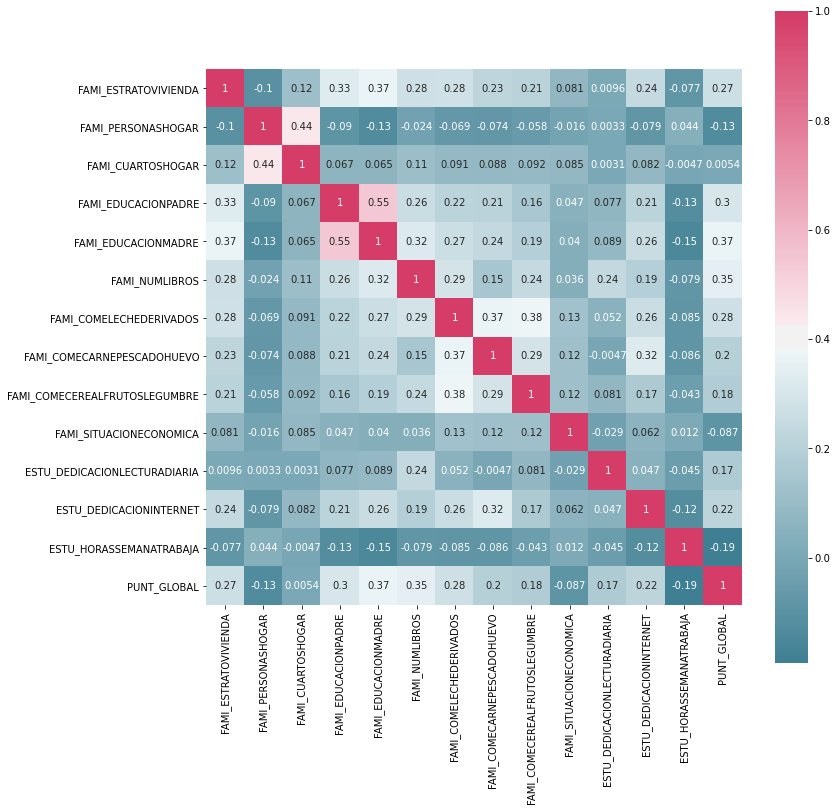

In [21]:
import seaborn as sns

# columns_scores_percentiles = [
#     'PERCENTIL_LECTURA_CRITICA', 
#     'PERCENTIL_MATEMATICAS', 
#     'PERCENTIL_C_NATURALES', 
#     'PERCENTIL_SOCIALES_CIUDADANAS', 
#     'PERCENTIL_INGLES', 
#     'PERCENTIL_GLOBAL']

column_scores = [
    'PUNT_GLOBAL']

f, ax = plt.subplots(figsize=(12, 12))
corr = df_2019_ordinal[list(oder_categorical_variables.keys()) + column_scores].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 1, as_cmap=True),
            square=True, ax=ax, annot=True)